In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re as re

In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
print (os.listdir("../titanic"))

['.ipynb_checkpoints', 'gender_submission.csv', 'submission.csv', 'submissions', 'submit_1.csv', 'test.csv', 'Titanic_Predictor.ipynb', 'train.csv', 'Untitled.ipynb', 'Untitled1.ipynb']


In [4]:
data_raw = pd.read_csv("train.csv")
train = data_raw.copy(deep = True)
test = pd.read_csv("test.csv")

fulldata = [train, test]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
370,371,1,1,"Harder, Mr. George Achilles",male,25.0,1,0,11765,55.4417,E50,C
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S
294,295,0,3,"Mineff, Mr. Ivan",male,24.0,0,0,349233,7.8958,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
135,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
614,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.0500,NaN,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


In [8]:
# Cleaning the dataset

In [9]:
print('Null values in Train: \n', train.isnull().sum())
print("-"*20)

print('Null values in Test: \n', test.isnull().sum())
print("-"*20)

Null values in Train: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
Null values in Test: 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
--------------------


In [10]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Madill, Miss. Georgette Alexandra",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [11]:
print (train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [12]:
print (train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [13]:
for dataset in fulldata:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']+1
    
print (train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [14]:
for dataset in fulldata:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (train[['IsAlone','Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [15]:
print (train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).count())

  Embarked  Survived
0        C       168
1        Q        77
2        S       644


In [16]:
for dataset in fulldata:
    dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])
    
print (train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).count())

  Embarked  Survived
0        C       168
1        Q        77
2        S       646


In [17]:
for dataset in fulldata:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
    dataset['CategoricalFare'] = pd.qcut(dataset['Fare'], 4)

print (train[['CategoricalFare','Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,CategoricalFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,"(7.91, 14.454]"


In [19]:
for dataset in fulldata:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size = age_null_count)
    
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
    dataset['CategoricalAge'] = pd.cut(dataset['Age'], 5)

print (train[['CategoricalAge','Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.512821
1   (16.0, 32.0]  0.367347
2   (32.0, 48.0]  0.351779
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [20]:
def get_title(name):
    title_search = re.search('([A-Za-z]+)\.', name)
    
    if title_search:
        return title_search.group(1)
    return ""

for dataset in fulldata:
    dataset['Title'] = dataset['Name'].apply(get_title)
    
print (pd.crosstab(train['Title'], train['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [21]:
train.info()
test.info()
train.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null object
Age                891 non-null int32
SibSp              891 non-null int64
Parch              891 non-null int64
Ticket             891 non-null object
Fare               891 non-null float64
Cabin              204 non-null object
Embarked           891 non-null object
FamilySize         891 non-null int64
IsAlone            891 non-null int64
CategoricalFare    891 non-null category
CategoricalAge     891 non-null category
Title              891 non-null object
dtypes: category(2), float64(1), int32(1), int64(7), object(6)
memory usage: 102.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId        418 non-null int64
Pclas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,CategoricalFare,CategoricalAge,Title
428,429,0,3,"Flynn, Mr. James",male,29,0,0,364851,7.75,NaN,Q,1,1,"(-0.001, 7.91]","(16.0, 32.0]",Mr
795,796,0,2,"Otter, Mr. Richard",male,39,0,0,28213,13.00,NaN,S,1,1,"(7.91, 14.454]","(32.0, 48.0]",Mr
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28,0,0,345770,9.50,NaN,S,1,1,"(7.91, 14.454]","(16.0, 32.0]",Mr
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48,1,0,11755,39.60,A16,C,2,0,"(31.0, 512.329]","(32.0, 48.0]",Lady
263,264,0,1,"Harrison, Mr. William",male,40,0,0,112059,0.00,B94,S,1,1,"(-0.001, 7.91]","(32.0, 48.0]",Mr


In [22]:
for dataset in fulldata:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
                    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
print (train[['Title','Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [23]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null object
Age                891 non-null int32
SibSp              891 non-null int64
Parch              891 non-null int64
Ticket             891 non-null object
Fare               891 non-null float64
Cabin              204 non-null object
Embarked           891 non-null object
FamilySize         891 non-null int64
IsAlone            891 non-null int64
CategoricalFare    891 non-null category
CategoricalAge     891 non-null category
Title              891 non-null object
dtypes: category(2), float64(1), int32(1), int64(7), object(6)
memory usage: 102.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId        418 non-null int64
Pclas

In [24]:
for dataset in fulldata:
    dataset['Cabin'] = dataset['Cabin'].fillna(0)
    
for dataset in fulldata:
    dataset['HasCabin'] = 0
    dataset.loc[dataset['Cabin'] == 0, 'HasCabin'] = 1
    
print (train[['HasCabin','Survived']].groupby(['HasCabin'], as_index=False).mean())

   HasCabin  Survived
0         0  0.666667
1         1  0.299854


In [25]:
train.info()
test.info()
train.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null object
Age                891 non-null int32
SibSp              891 non-null int64
Parch              891 non-null int64
Ticket             891 non-null object
Fare               891 non-null float64
Cabin              891 non-null object
Embarked           891 non-null object
FamilySize         891 non-null int64
IsAlone            891 non-null int64
CategoricalFare    891 non-null category
CategoricalAge     891 non-null category
Title              891 non-null object
HasCabin           891 non-null int64
dtypes: category(2), float64(1), int32(1), int64(8), object(6)
memory usage: 109.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
Passe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,CategoricalFare,CategoricalAge,Title,HasCabin
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48,1,2,220845,65.0,0,S,4,0,"(31.0, 512.329]","(32.0, 48.0]",Mrs,1
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45,1,4,347088,27.9,0,S,6,0,"(14.454, 31.0]","(32.0, 48.0]",Mrs,1
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28,0,0,345770,9.5,0,S,1,1,"(7.91, 14.454]","(16.0, 32.0]",Mr,1
641,642,1,1,"Sagesser, Mlle. Emma",female,24,0,0,PC 17477,69.3,B35,C,1,1,"(31.0, 512.329]","(16.0, 32.0]",Miss,0
99,100,0,2,"Kantor, Mr. Sinai",male,34,1,0,244367,26.0,0,S,2,0,"(14.454, 31.0]","(32.0, 48.0]",Mr,1


In [26]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

for dataset in fulldata:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['Fare_Code'] = label.fit_transform(dataset['CategoricalFare'])
    dataset['Age_Code'] = label.fit_transform(dataset['CategoricalAge'])

In [27]:
col = ['Pclass', 'Sex', 'CategoricalAge', 'CategoricalFare', 'Title', 'HasCabin']


In [28]:
train_data = pd.get_dummies(train[col], drop_first = True)
test_data = pd.get_dummies(test[col], drop_first = True)

In [29]:
train_data_col = train_data.columns.tolist()
test_data_col = test_data.columns.tolist()

In [30]:
y_train_data = train['Survived']

In [31]:
train_data_col

['Pclass',
 'HasCabin',
 'Sex_male',
 'CategoricalAge_(16.0, 32.0]',
 'CategoricalAge_(32.0, 48.0]',
 'CategoricalAge_(48.0, 64.0]',
 'CategoricalAge_(64.0, 80.0]',
 'CategoricalFare_(7.91, 14.454]',
 'CategoricalFare_(14.454, 31.0]',
 'CategoricalFare_(31.0, 512.329]',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Rare']

In [32]:
X_train_data = train_data.values
X_test_data = test_data.values
y_train_data = y_train_data.values

In [33]:
X_train_data

array([[3, 1, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [3, 1, 0, ..., 0, 0, 0],
       ...,
       [3, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 1, 0, 0],
       [3, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [34]:
X_test_data

array([[3, 1, 1, ..., 1, 0, 0],
       [3, 1, 0, ..., 0, 1, 0],
       [2, 1, 1, ..., 1, 0, 0],
       ...,
       [3, 1, 1, ..., 1, 0, 0],
       [3, 1, 1, ..., 1, 0, 0],
       [3, 1, 1, ..., 0, 0, 0]], dtype=int64)

In [35]:
y_train_data

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [36]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [37]:
X_train_data = sc_X.fit_transform(X_train_data)

In [38]:
X_test_data = sc_X.transform(X_test_data)

In [39]:
X_train_data

array([[ 0.82737724,  0.54492498,  0.73769513, ...,  0.85053175,
        -0.40583972, -0.16278113],
       [-1.56610693, -1.835115  , -1.35557354, ..., -1.17573506,
         2.4640269 , -0.16278113],
       [ 0.82737724,  0.54492498, -1.35557354, ..., -1.17573506,
        -0.40583972, -0.16278113],
       ...,
       [ 0.82737724,  0.54492498, -1.35557354, ..., -1.17573506,
        -0.40583972, -0.16278113],
       [-1.56610693, -1.835115  ,  0.73769513, ...,  0.85053175,
        -0.40583972, -0.16278113],
       [ 0.82737724,  0.54492498,  0.73769513, ...,  0.85053175,
        -0.40583972, -0.16278113]])

In [40]:
# below code beautifully shows accuracy across various methodologies - borrowed from Sina's work at https://www.kaggle.com/sinakhorami/titanic-best-working-classifier

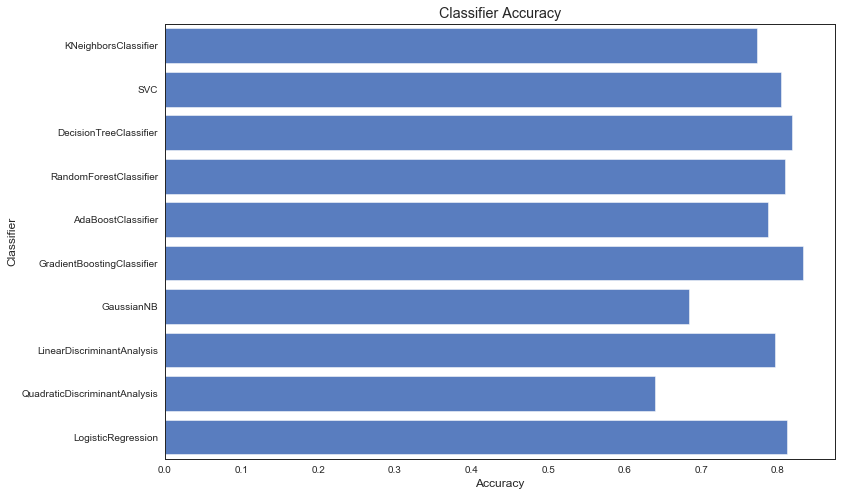

In [41]:

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = X_train_data
y = y_train_data

acc_dict = {}

for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")


In [42]:
candidate_classifier = DecisionTreeClassifier()
candidate_classifier.fit(X_train_data, y_train_data)

submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = candidate_classifier.predict(X_test_data)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [43]:
#submission.to_csv("submit_1.csv", index = False)